# Ejercicio de Regresion Logistica en Python

Para comenzar se realizan los import necesarios de los paquetes que se utilizaran durante el ejercicio.

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Carga del archivo csv (datos de entrada)

El archivo csv(por simplicidad, se considera que estara en el mismo directorio que el archivo de notebook,ipynb) y se asigna mediante pandas a la variable dataframe. Al utilizar el metodo de dataframe.head() se visualiza en pantalla los primeros 5 registros.

In [3]:
dataframe =pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuacion se utiliza el metodo dataframe.describe() que proporcina estadistica descriptiva del conjunto de datos: media, desviacion estandar, valores minimo y maximo de cada atributo.

In [4]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Se cuantificaran resultados de cada tipo usando la funcion groupby y se visualizan 86 usuarios "Clase 0", es decir windows, 40 usuarios Mac y 44 de Linux.

In [5]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


### Visualizamos los datos

Se realiza una visualizacion para conocer los atributos caracteristicos de la informacion que se trabaja y su correlacion.

En formato de histograma aparecen los cuatro atributos de entrada etiquetados como, "duracion", "paginas", "acciones" y "valor". Se puede apreciar graficamente entre que valores se comprenden sus minimos y maximos y en que intervalos se concentra la mayor densidad de registros.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002933C1B8108>,
      dtype=object)

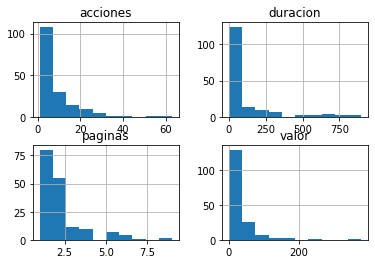

In [6]:
dataframe.drop(['clase'],1).hist()

Ademas se pueden interrelacionar las entradas de pares, para ver como se concentra linealmente las salidas de usuarios por colores: Sistema operativo de windows en azul, Macintosh en verde y Linux en rojo.

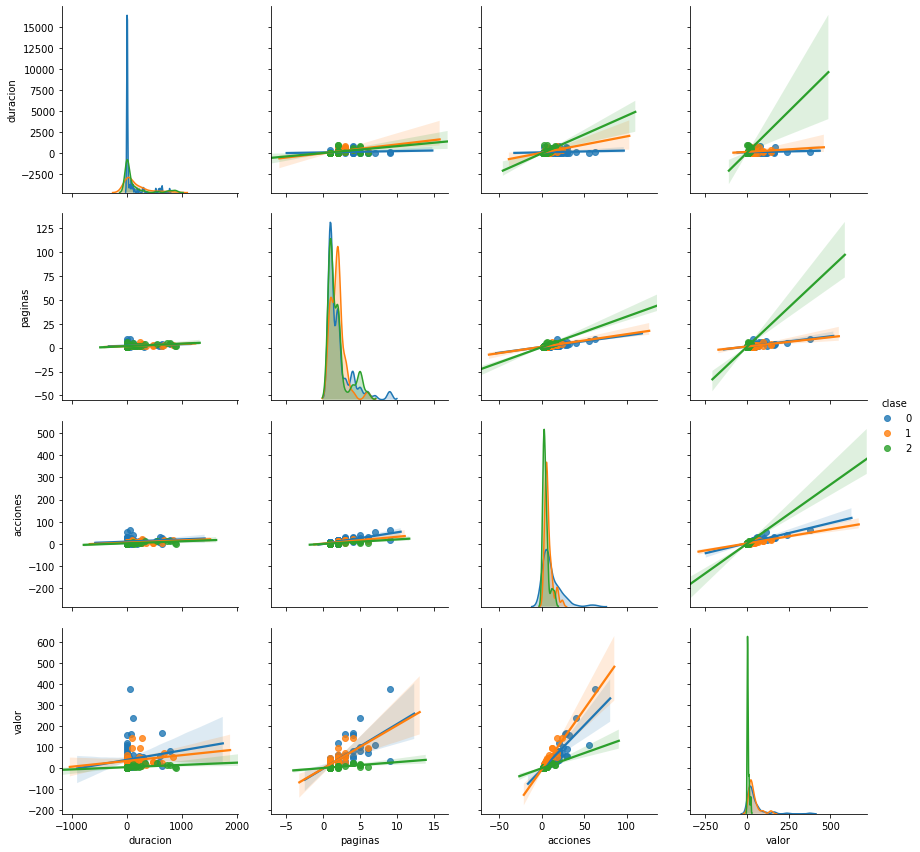

In [9]:
sb.pairplot(dataframe.dropna(),hue='clase',height=3,vars=["duracion", "paginas", "acciones", "valor"],kind='reg')

### Se establece el modelo R Log

Se cargan los atributos de las 4 columnas de entrada en X excluyendo la columna 'clase' con el metodo drop(). La columna 'clase' se agrega al atributo y, se ejecuta X.shape para comprobar la dimension de la matriz con datos de entrada de 170 registros por 4 columnas.

In [10]:
X= np.array(dataframe.drop(['clase'],1))
y=np.array(dataframe['clase'])
X.shape

(170, 4)

y se crea el modelo de RLog haciendo que se ajuste (fit) al conjunto de entradas X y salidas 'y'.

In [11]:
model=linear_model.LogisticRegression()
model.fit(X,y)

C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Una vez compilado el modelo, se clasificara todo el conjunto de entradas X utilizando el metodo"predict(X)". Si se revisan algunas de sus salidas se puede ver como coincide con las salidas reales del archivo csv.

In [13]:
predictions=model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


y se confirma el desempeño del modelo utilizado model.score() el cual devuelve la precision media de las predicciones, para este caso del 77%.

In [15]:
model.score(X,y)

0.7764705882352941